In [46]:
import logging
from datetime import datetime
from pathlib import Path

import pandas as pd
import yaml
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



In [47]:

import os

from icecream import ic

# Load the training data
df = pd.read_csv('../data/train.csv')


In [53]:
import logging
from datetime import datetime
from pathlib import Path

import pandas as pd
import yaml
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

logging.basicConfig(filename='data_cleaning.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', filemode='a')
logger = logging.getLogger(__name__)
logger.info(f"Started data preprocessing at {datetime.now()}.")

# Load the training data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Display the first few rows of the dataframe
def display_head(df):
    return df.head()

# Visualize missing data using missingno library
def visualize_missing_data(df):
    import missingno as msno
    msno.matrix(df)

# Remove columns with missing values exceeding a threshold
def remove_high_null_columns(df, threshold=0.10):
    null_percentage_count = {}
    high_null_counts = []
    
    for column in df.columns:
        x = df[column].isnull().sum() / df[column].shape[0]
        null_percentage_count[column] = x
        if x > threshold:
            high_null_counts.append(column)
        
        # print(f'{column:15} : {x}')
    
    df.drop(high_null_counts, axis=1, inplace=True)
    return df

# Remove duplicate rows
def remove_duplicates(df):
    df.drop_duplicates(inplace=True)
    return df

# Display information about the dataframe
def display_info(df):
    df.info()

# Display summary statistics of the dataframe
def display_statistics(df):
    df.describe()

# Remove columns with high cardinality
def remove_high_cardinality_columns(df, threshold=0.80):
    cardinality_percentage_count = {}
    high_cardinal_columns = []
    
    for column in df.columns:
        x = df[column].nunique() / df[column].shape[0]
        cardinality_percentage_count[column] = x
        if x > threshold:
            high_cardinal_columns.append(column)
        
        # print(f'{column:15} : {x:.3f} : {df[column].dtype}')
    
    df.drop(high_cardinal_columns, axis=1, inplace=True)
    return df

# Separate categorical and numerical columns
def separate_categorical_numerical(df):
    cat_df = df.select_dtypes(exclude='number')
    num_df = df.select_dtypes(include='number')
    return cat_df, num_df

# Display the number of unique values for each categorical column
def display_categorical_unique_values(cat_df):
    cat_df.nunique()

# Your main processing function
def main_processing(file_path):
    df = load_data(file_path)
    
    # Data Cleaning
    visualize_missing_data(df)
    df = remove_high_null_columns(df)
    df = remove_duplicates(df)
    # display_info(df)
    # display_statistics(df)
    df = remove_high_cardinality_columns(df)
    
    # Preprocessing
    cat_df, num_df = separate_categorical_numerical(df)
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('impute_null_nums', SimpleImputer(strategy='mean'), num_df.columns),
            ('impute_null_cats', SimpleImputer(strategy='most_frequent'), cat_df.columns),  # You can use other strategies as well

            ('one_hot_encode', OneHotEncoder(), cat_df.columns)
        ],
        remainder='passthrough'
    )

    # Create a pipeline with the preprocessor
    pipeline = Pipeline([
        ('preprocessor', preprocessor)
    ])

    # Apply the preprocessing steps to your DataFrame
    df_transformed = pipeline.fit_transform(df)

    
    # Additional preprocessing using sklearn's ColumnTransformer and other preprocessing classes
    # Define your transformers and preprocessors here
    
    return df, df_transformed, preprocessor



/home/t/aproject/house-price-prediction-MLOPS-experimetation-and-versioning/src
DATAFRAME




TRANSFORMED


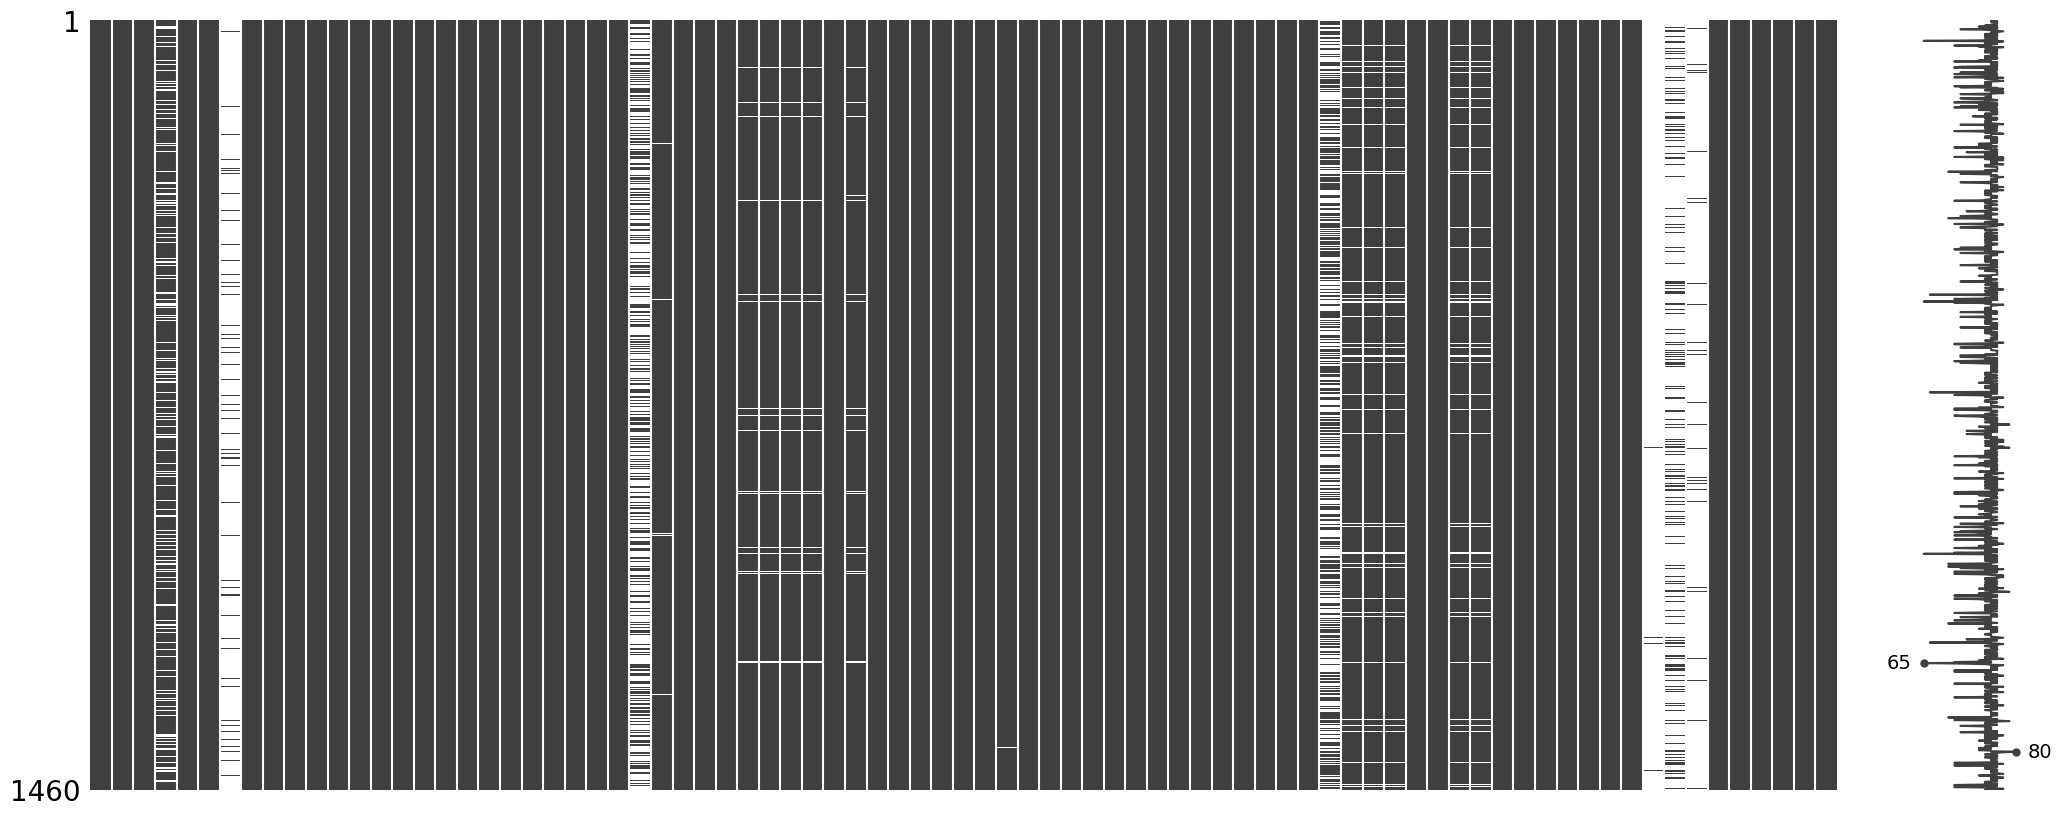

In [55]:
# Example usage
import os
file_path = '../data/train.csv'
print(os.getcwd())
df, df_transformed, preprocessor = main_processing(file_path)
print('DATAFRAME')
# print(df.shape)
print('\n'*3)
print("TRANSFORMED")
# print(df_transformed.shape)


In [56]:
type(df), type(df_transformed)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [ ]:
import random